In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [148]:
messages = pd.read_csv('SmsCollection.csv', sep=';', names=["label", "message"], skiprows=1)
messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [149]:
messages.describe()

label                 message
count   5572                    5570
unique     2                    5158
top      ham  Sorry, I'll call later
freq    4825                      30

In [150]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4823   4505                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [151]:
messages = messages.astype(str)

messages['length'] = messages['message'].apply(len)
messages.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

(array([2.25e+02, 1.51e+03, 9.93e+02, 6.04e+02, 4.42e+02, 3.03e+02,
        3.17e+02, 3.89e+02, 6.23e+02, 6.60e+01, 2.20e+01, 1.20e+01,
        1.70e+01, 1.00e+01, 1.00e+00, 1.10e+01, 5.00e+00, 3.00e+00,
        3.00e+00, 2.00e+00, 3.00e+00, 1.00e+00, 2.00e+00, 3.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 746.56, 764.72, 782.88, 801.04, 819.2 , 837.36, 85

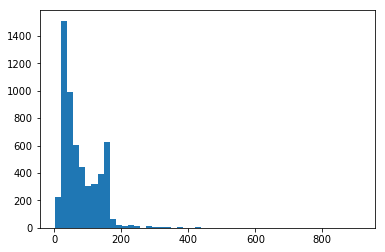

In [152]:
plt.hist(messages['length'],bins=50) 

In [153]:
messages.length.describe()

count    5572.000000
mean       76.935032
std        56.060486
min         2.000000
25%        34.000000
50%        58.000000
75%       116.250000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D24E4DAC0>,
      dtype=object)

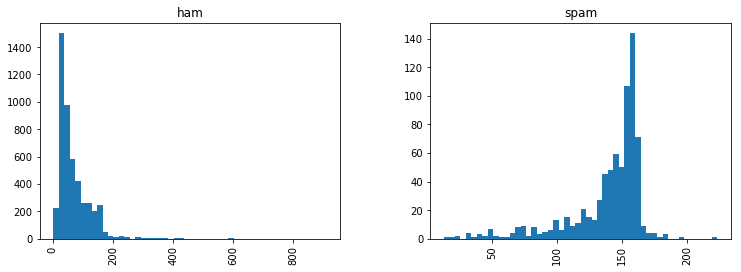

In [154]:

messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [155]:
print('Ham:\n',messages[messages['label']=='ham'].length.describe())
print('Spam:\n',messages[messages['label']=='spam'].length.describe())

Ham:
 count    4825.000000
mean       67.382798
std        53.090550
min         2.000000
25%        32.000000
50%        50.000000
75%        87.000000
max       910.000000
Name: length, dtype: float64
Spam:
 count    747.000000
mean     138.634538
std       29.002617
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: length, dtype: float64


Average length of spam message is larger

In [156]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [157]:
messages.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [158]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'])

msg_train_len = msg_train.apply(len)
msg_test_len = msg_test.apply(len)

In [159]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [160]:
msg_train.apply(text_process)

51                        [gram, usually, runs, like, lt]
2257                      [checked, heading, drop, stuff]
4250       [Loosu, go, hospital, De, dont, let, careless]
4685    [life, Means, lot, love, life, love, people, l...
2329                          [day, asked, anand, number]
                              ...                        
1731                             [project, w, frens, lor]
368     [discount, code, RP176781, stop, messages, rep...
1270                [Tee, hee, lecture, cheery, bye, bye]
3269       [never, wanted, tell, im, short, onedge, late]
4772                                [Hii, got, money, da]
Name: message, Length: 4179, dtype: object

In [161]:
msg_test.apply(text_process)

1695    [Ü, eatin, later, im, eatin, wif, frens, lei, ...
1515                                 [Kall, bestcongrats]
3095    [emigrated, something, Ok, maybe, 530, bit, ho...
2798         [get, ten, billion, calls, texts, help, god]
4747              [Orh, tot, u, say, still, dun, believe]
                              ...                        
1568                       [whatever, im, pretty, pissed]
3698    [winner, specially, selected, receive, £1000, ...
3323    [Ok, darlin, supose, ok, worry, muchi, film, s...
1843                                  [comingdown, later]
1812    [ü, wan, 2, meet, n, combine, parts, Hows, da,...
Name: message, Length: 1393, dtype: object

In [162]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
#bow_transformer1 = CountVectorizer(analyzer=text_process).fit(msg_train)
#bow_transformer2 = CountVectorizer(analyzer=text_process).fit(msg_test)
#messages_bow = bow_transformer.transform(messages['message'])
messages_bow_train = bow_transformer.transform(msg_train)
messages_bow_test = bow_transformer.transform(msg_test)

In [163]:
print('Shape of Sparse Matrix: ', messages_bow_train.shape)
print('Shape of Sparse Matrix: ', messages_bow_test.shape)

Shape of Sparse Matrix:  (4179, 11065)
Shape of Sparse Matrix:  (1393, 11065)


In [164]:
#tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_transformer1 = TfidfTransformer().fit(messages_bow_train)
messages_tfidf_train = tfidf_transformer1.transform(messages_bow_train)
tfidf_transformer2 = TfidfTransformer().fit(messages_bow_test)
messages_tfidf_test = tfidf_transformer2.transform(messages_bow_test)

In [165]:
"""
from scipy import sparse
import numpy as np
from scipy.sparse import coo_matrix

msg_train_len = msg_train.apply(len)
msg_train_len = np.array(msg_train_len)
msg_train_len = msg_train_len[:,None]
msg_train_len = coo_matrix(msg_train_len).tocsr()
messages_train = sparse.hstack((messages_tfidf_train, msg_train_len))
messages_train  = messages_train.tocsr()

msg_test_len = msg_test.apply(len)
msg_test_len = np.array(msg_test_len)
msg_test_len = msg_test_len[:,None]
msg_test_len = coo_matrix(msg_test_len).tocsr()
messages_test = sparse.hstack((messages_tfidf_test, msg_test_len))
messages_test  = messages_test.tocsr()
print(messages_test)
"""

'\nfrom scipy import sparse\nimport numpy as np\nfrom scipy.sparse import coo_matrix\n\nmsg_train_len = msg_train.apply(len)\nmsg_train_len = np.array(msg_train_len)\nmsg_train_len = msg_train_len[:,None]\nmsg_train_len = coo_matrix(msg_train_len).tocsr()\nmessages_train = sparse.hstack((messages_tfidf_train, msg_train_len))\nmessages_train  = messages_train.tocsr()\n\nmsg_test_len = msg_test.apply(len)\nmsg_test_len = np.array(msg_test_len)\nmsg_test_len = msg_test_len[:,None]\nmsg_test_len = coo_matrix(msg_test_len).tocsr()\nmessages_test = sparse.hstack((messages_tfidf_test, msg_test_len))\nmessages_test  = messages_test.tocsr()\nprint(messages_test)\n'

In [166]:
spam_detect_model = MultinomialNB().fit(messages_tfidf_train, label_train)

In [167]:
all_predictions = spam_detect_model.predict(messages_tfidf_test)

In [168]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(label_test, all_predictions)
print(matrix)
# TP FN
# FP TN

[[1207    0]
 [  44  142]]


In [169]:
report = classification_report(label_test, all_predictions)
print(report)

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1207
        spam       1.00      0.76      0.87       186

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



In [170]:
print(messages_bow_test[0])

  (0, 6031)	2
  (0, 6370)	1
  (0, 6490)	1
  (0, 6658)	1
  (0, 6932)	1
  (0, 7073)	1
  (0, 7458)	1
  (0, 7500)	1
  (0, 10717)	1
  (0, 11055)	2
